In [ ]:
# Import Required Libraries
from tables.table import Col
import pandas as pd
pd.set_option('display.max_columns', 20)
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
import string
import gensim.downloader as api

In [2]:
# Mount Google Drive to access files in Google Colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
# Unzip the 'combined_data.zip' file in the Colab environment
!unzip -uq /content/drive/MyDrive/combined_data.zip

In [4]:
# Read the data from the 'combined_data.csv' file
df = pd.read_csv('/content/combined_data.csv')

# Display the first few rows
df.head()

,article,summary
0,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314196 entries, 0 to 314195
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   article  314196 non-null  object
 1   summary  314196 non-null  object
dtypes: object(2)
memory usage: 4.8+ MB


In [6]:
# Check for missing values
df.isnull().sum()

article    0
summary    0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

3199

In [8]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for duplicate rows again
df.duplicated().sum()

0

In [9]:
# Set a random seed for reproducibility
random_seed = 42
# Sample 10,000 rows
sample_df = df.sample(n=10000, random_state=random_seed)
# Reset the index of the sampled DataFrame and modify it in-place
sample_df.reset_index(drop=True, inplace=True)
# Display the last rows of the sampled DataFrame
sample_df.tail()

,article,summary
9995,(CNN) -- Luxembourg's Andy Schleck has been fo...,Andy Schleck pulls out of this year's Tour de ...
9996,(CNN) -- Palestinian Authority President Mahmo...,NEW: Rebranding comes amid efforts to unify ri...
9997,"By . Kerry Mcdermott . PUBLISHED: . 05:09 EST,...",Once vibrant city has witnessed a painful decl...
9998,"By . Hugo Gye . PUBLISHED: . 10:51 EST, 17 Dec...",Member of Bridgend Conservative Club resigns a...
9999,"LONDON, England (CNN) -- Juventus took on Tori...",Last weekend Juventus and Torino faced off in ...


In [10]:
# Display summary statistics of the sampled DataFrame
sample_df.describe()

,article,summary
count,10000,10000
unique,10000,9992
top,By . Hugo Gye . Police have been forced to ste...,This page includes the show Transcript and the...
freq,1,4


In [11]:
def count_stopwords(text, stopwords):
    """
    Count the number of stopwords in a given text.

    Args:
        text (str): The input text to analyze.
        stopwords (list): A list of stopwords.

    Returns:
        int: The count of stopwords in the text.
    """
    word_tokens = word_tokenize(text)
    stop_words = [word for word in word_tokens if word in stopwords]
    return len(stop_words)


In [12]:
def split_sentences(text):
    """
    Split a text into sentences using NLTK's sentence tokenizer.

    Args:
        text (str): The input text to split.

    Returns:
        list: A list of sentences in the text.
    """
    sentences = nltk.sent_tokenize(text)
    return sentences

In [13]:
# define stopwords and punctuation
stopwords = stopwords.words('english')
punc = string.punctuation

# Count the number of sentences in 'article' and 'summary' columns
sample_df['article_sentence_count'] = sample_df['article'].apply(lambda x: len(split_sentences(x)))
sample_df['summary_sentence_count'] = sample_df['summary'].apply(lambda x: len(split_sentences(x)))

# Count the number of words in 'article' and 'summary' columns
sample_df['article_word_count'] = sample_df['article'].apply(lambda x: len(x.split()))
sample_df['summary_word_count'] = sample_df['summary'].apply(lambda x: len(x.split()))

# Count the number of characters (excluding spaces) in 'article' and 'summary' columns
sample_df['article_char_count'] = sample_df['article'].apply(lambda x: len(x.replace(" ", "")))
sample_df['summary_char_count'] = sample_df['summary'].apply(lambda x: len(x.replace(" ", "")))

# Calculate word density (words per character) in 'article' and 'summary' columns
sample_df['article_word_density'] = sample_df['article_word_count'] / (sample_df['article_char_count'] + 1)
sample_df['summary_word_density'] = sample_df['summary_word_count'] / (sample_df['summary_char_count'] + 1)

# Calculate sentence density (sentences per word) in 'article' and 'summary' columns
sample_df['article_sentence_density'] = sample_df['article_sentence_count'] / (sample_df['article_word_count'] + 1)
sample_df['summary_sentence_density'] = sample_df['summary_sentence_count'] / (sample_df['summary_word_count'] + 1)

# Count the number of punctuation marks in 'article' and 'summary' columns
sample_df['article_punctuation_count'] = sample_df['article'].apply(lambda x: len([a for a in x if a in punc]))
sample_df['summary_punctuation_count'] = sample_df['summary'].apply(lambda x: len([a for a in x if a in punc]))

# Count the number of stopwords in 'article' and 'summary' columns
sample_df['article_stopwords_count'] = sample_df['article'].apply(lambda x: count_stopwords(x, stopwords))
sample_df['summary_stopwords_count'] = sample_df['summary'].apply(lambda x: count_stopwords(x, stopwords))

# Calculate stopwords density (stopwords per word) in 'article' and 'summary' columns
sample_df['article_stopwords_density'] = sample_df['article_stopwords_count'] / (sample_df['article_word_count'] + 1)
sample_df['summary_stopwords_density'] = sample_df['summary_stopwords_count'] / (sample_df['summary_word_count'] + 1)

sample_df.head()

,article,summary,article_sentence_count,summary_sentence_count,article_word_count,summary_word_count,article_char_count,summary_char_count,article_word_density,summary_word_density,article_sentence_density,summary_sentence_density,article_punctuation_count,summary_punctuation_count,article_stopwords_count,summary_stopwords_count,article_stopwords_density,summary_stopwords_density
0,By . Hugo Gye . Police have been forced to ste...,Family were walking along sea wall in Mullion ...,81,4,886,53,4014,258,0.220672,0.204633,0.091319,0.074074,140,6,350,16,0.394589,0.296296
1,By . Julian Robinson . Children are five times...,"More than 10,000 homes across the U.S. were as...",32,5,633,69,3155,343,0.200570,0.200581,0.050473,0.071429,85,10,256,18,0.403785,0.257143
2,Party leader Nick Clegg depicted a 'diminished...,Lib Dems evoked a nightmarish image of Britain...,15,4,340,51,1649,228,0.206061,0.222707,0.043988,0.076923,64,8,115,16,0.337243,0.307692
3,(CNN) -- Thirty days of signs and signals have...,Michael D'Antonio: Pope Francis' first month h...,48,4,954,52,4781,238,0.199498,0.217573,0.050262,0.075472,180,10,393,14,0.411518,0.264151
4,A former food addict who had spent her whole l...,Hazel's food addiction saw her binging on pizz...,47,6,911,78,3895,311,0.233830,0.250000,0.051535,0.075949,179,10,366,29,0.401316,0.367089


In [14]:
# Select specific columns related to the 'article' from the DataFrame 'sample_df'
article_columns = sample_df[['article_sentence_count', 'article_word_count', 'article_char_count',
                             'article_word_density', 'article_sentence_density',
                             'article_punctuation_count', 'article_stopwords_count']]

# Select specific columns related to the 'summary' from the DataFrame 'sample_df'
summary_columns = sample_df[['summary_sentence_count', 'summary_word_count', 'summary_char_count',
                             'summary_word_density', 'summary_sentence_density',
                             'summary_punctuation_count', 'summary_stopwords_count']]

In [15]:
# Generate descriptive statistics for the 'article' columns
article_columns.describe()

,article_sentence_count,article_word_count,article_char_count,article_word_density,article_sentence_density,article_punctuation_count,article_stopwords_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,38.833000,691.475900,3341.098100,0.206878,0.055309,118.57570,268.839600
std,23.914316,340.192683,1635.861178,0.011263,0.015006,66.19521,137.768619
min,2.000000,45.000000,208.000000,0.142529,0.023910,6.00000,16.000000
25%,22.000000,438.000000,2120.750000,0.199130,0.045317,70.00000,167.000000
50%,33.000000,631.000000,3044.000000,0.206788,0.051998,104.00000,244.000000
75%,50.000000,883.000000,4244.250000,0.214430,0.061988,153.00000,346.000000
max,288.000000,2969.000000,13236.000000,0.250522,0.336449,509.00000,1281.000000


In [16]:
# Generate descriptive statistics for the 'summary' columns
summary_columns.describe()

,summary_sentence_count,summary_word_count,summary_char_count,summary_word_density,summary_sentence_density,summary_punctuation_count,summary_stopwords_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.694600,52.804900,253.023800,0.208132,0.071861,8.340800,16.389600
std,1.371758,27.129652,129.204807,0.017375,0.016494,5.595604,11.246398
min,1.000000,6.000000,34.000000,0.119403,0.003077,0.000000,0.000000
25%,3.000000,39.000000,184.000000,0.196629,0.062500,5.000000,10.000000
50%,4.000000,49.000000,237.000000,0.207921,0.073171,7.000000,14.000000
75%,4.000000,61.000000,289.000000,0.219438,0.081081,10.000000,20.000000
max,33.000000,1430.000000,6598.000000,0.292683,0.179012,222.000000,619.000000


In [17]:
def plot_box_plots(data, columns):
    """
    Plot box plots for specified columns from a DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing the columns to plot.
        columns (list): List of column names to create box plots for.

    Returns:
        None
    """

    # Create a 2x3 grid of subplots to accommodate up to 6 columns
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
    axes = axes.flatten()

    # Plot box plots for each column in the specified list
    for i, col in enumerate(columns):
        if i < 6:  # Limit the number of plots to 6 (if there are more columns)
            ax = axes[i]
            ax.boxplot(data[col], vert=True)  # Create the box plot
            ax.set_title(col)  # Set the title for the subplot
            ax.set_xlabel("Value")  # Set the label for the x-axis

    # Hide any remaining empty subplots (if there are fewer than 6 columns)
    for i in range(len(columns), 6):
        axes[i].axis('off')

    plt.tight_layout()  # Adjust layout and spacing between subplots
    plt.show()  # Display the plot

In [21]:
def plot_histograms(data, num_rows=None, num_cols=None):
    """
    Plot histograms for each column in the DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing columns to plot.
        num_rows (int): Number of rows for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.
        num_cols (int): Number of columns for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.

    Returns:
        None
    """
    # Get the column names from the DataFrame
    columns = data.columns

    # Calculate the number of rows and columns for the subplots
    if num_rows is None and num_cols is None:
        num_rows = int(len(columns) ** 0.5)
        num_cols = (len(columns) + num_rows - 1) // num_rows
    elif num_rows is None:
        num_rows = (len(columns) + num_cols - 1) // num_cols
    elif num_cols is None:
        num_cols = (len(columns) + num_rows - 1) // num_rows

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 6))

    # Flatten the axes array to easily iterate over each subplot
    axes = axes.flatten()

    # Plot histograms for each column on the corresponding subplot
    for i, col in enumerate(columns):
        if i < len(columns):
            ax = axes[i]
            ax.hist(data[col], bins=10)  # Adjust the number of bins as needed
            ax.set_title(col)
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")

    # Hide any remaining empty subplots
    for i in range(len(columns), num_rows * num_cols):
        axes[i].axis('off')

    # Adjust layout and spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


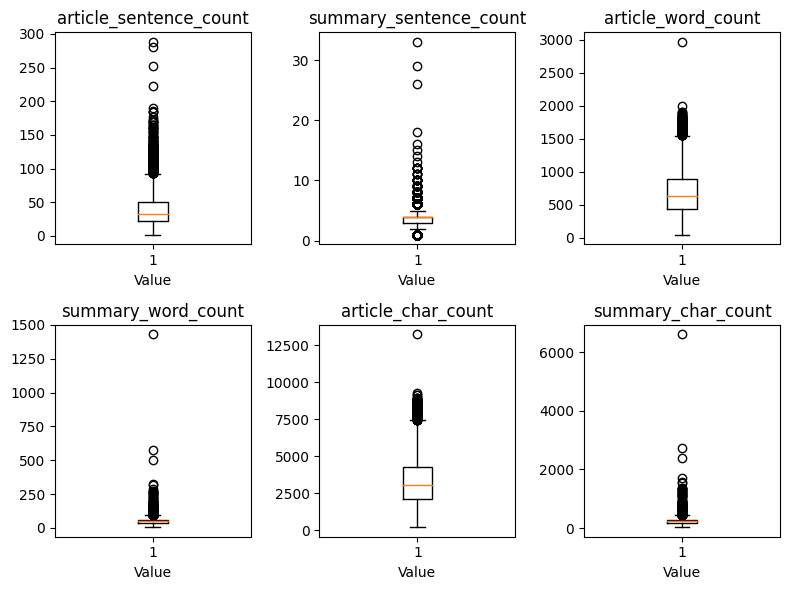

In [19]:
columns_to_plot= ['article_sentence_count','summary_sentence_count','article_word_count',
                            'summary_word_count','article_char_count', 'summary_char_count']
plot_box_plots(sample_df, columns_to_plot)

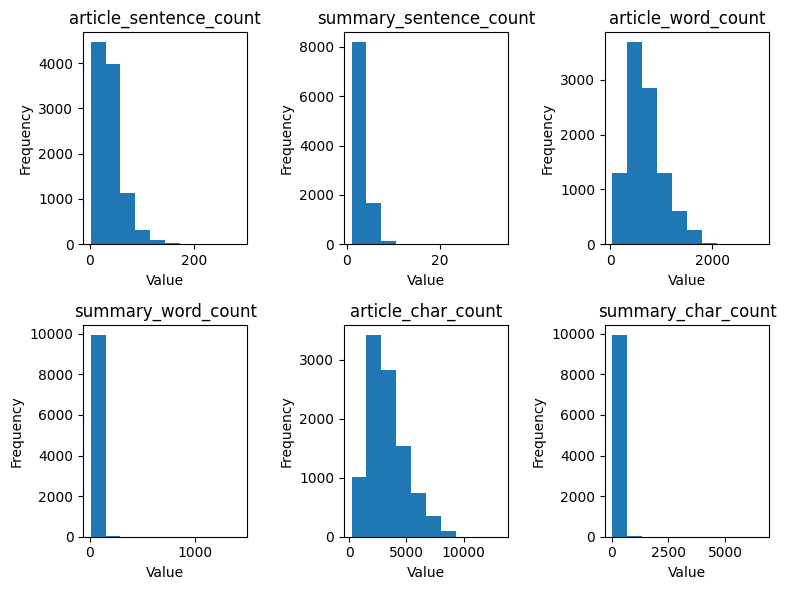

In [22]:
# Select the columns to plot histograms
columns_to_plot = sample_df[['article_sentence_count', 'summary_sentence_count',
                             'article_word_count', 'summary_word_count',
                             'article_char_count', 'summary_char_count']]

# Plot histograms for the selected columns in a 2x3 grid
plot_histograms(columns_to_plot, 2, 3)

In [23]:
def get_pos_tags(sentences, tagset='universal'):
    """
    Get the part-of-speech (POS) tags for a list of sentences.

    Args:
        sentences (list): A list of sentences to be POS tagged.
        tagset (str): The tagset to use for POS tagging (default is 'universal').

    Returns:
        DataFrame: A DataFrame containing the count of each POS tag for each sentence.
                  Columns are in the order: 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN',
                  'NUM', 'PRT', 'PRON', 'VERB', '.', 'X'.
    """
    pos_tags_list = []
    for sent in sentences:
        # Tokenize the sentence into words and get the POS tags using nltk.pos_tag
        pos_tags = Counter([j for i, j in nltk.pos_tag(word_tokenize(sent), tagset=tagset)])
        pos_tags_list.append(pos_tags)

    # Create the DataFrame directly from the list of dictionaries
    df = pd.DataFrame(pos_tags_list).fillna(0).astype(int)

    # Reorder the columns to match the desired order
    df = df[['ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRT', 'PRON', 'VERB', '.', 'X']]

    return df

# Identify the POS taggings for the 'article' variable
article = sample_df['article'].values
df_article = get_pos_tags(article)

# Identify the POS taggings for the 'summary' variable
summary = sample_df['summary'].values
df_summary = get_pos_tags(summary)


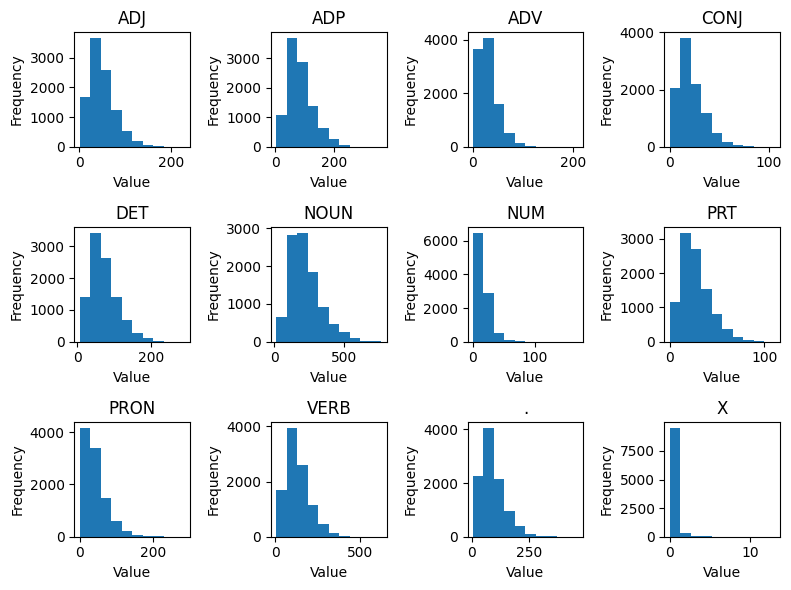

In [24]:
# Call the `plot_histograms` function for the `df_article`
plot_histograms(df_article, 3, 4)


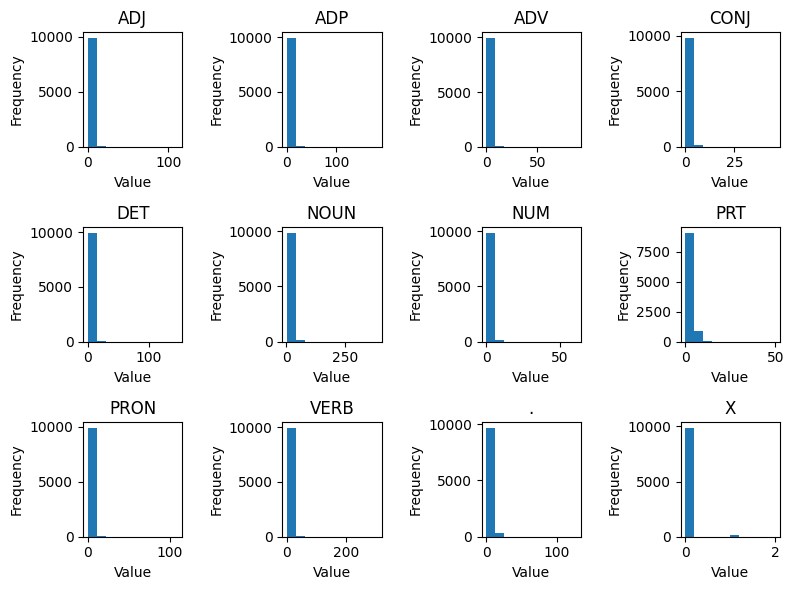

In [25]:
# Call the `plot_histograms` function for the `df_summary`
plot_histograms(df_summary, 3, 4)

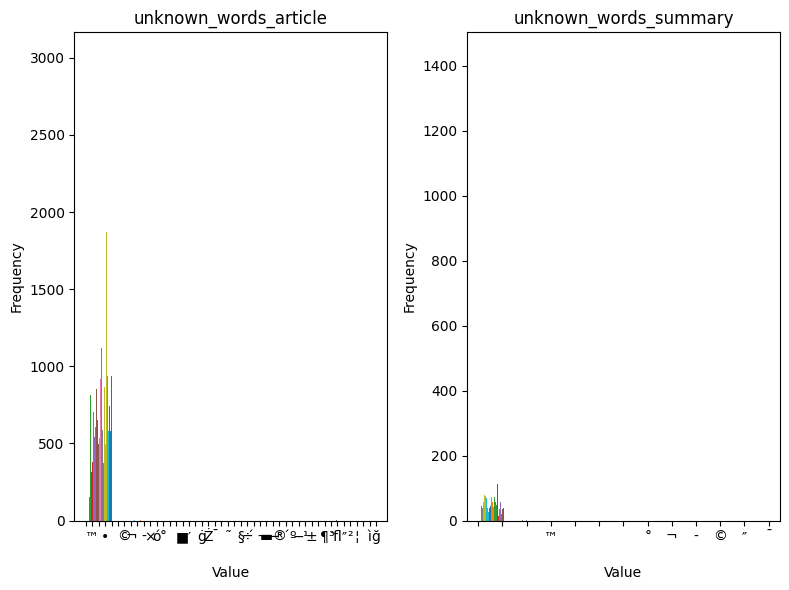

In [26]:
#Check for Unknown Words(names, surnames, locations or misspelled words)
def count_unknown_words(tokenize_text, vocab):

    unknown_words = [word for word in tokenize_text if word.lower() not in vocab]
    return unknown_words

# Download the pre-trained GloVe word vectors (choose the appropriate dimension)
glove_vectors = api.load('glove-wiki-gigaword-100')

# Get the vocabulary of the GloVe embeddings
glove_vocab = set(glove_vectors.key_to_index.keys())

# Assuming you have a DataFrame named sample_df with 'article' and 'summary' columns

# Count unknown words in 'article' column
sample_df['unknown_words_article'] = sample_df['article'].apply(lambda x: count_unknown_words(x, glove_vocab))

# Count unknown words in 'summary' column
sample_df['unknown_words_summary'] = sample_df['summary'].apply(lambda x: count_unknown_words(x, glove_vocab))

# Select the columns containing unknown word counts
unknown_words_cols = sample_df[['unknown_words_article', 'unknown_words_summary']]

# Call the `plot_histograms` function for the unknown word counts DataFrame with 1 row and 2 columns of subplots
plot_histograms(unknown_words_cols, 1, 2)


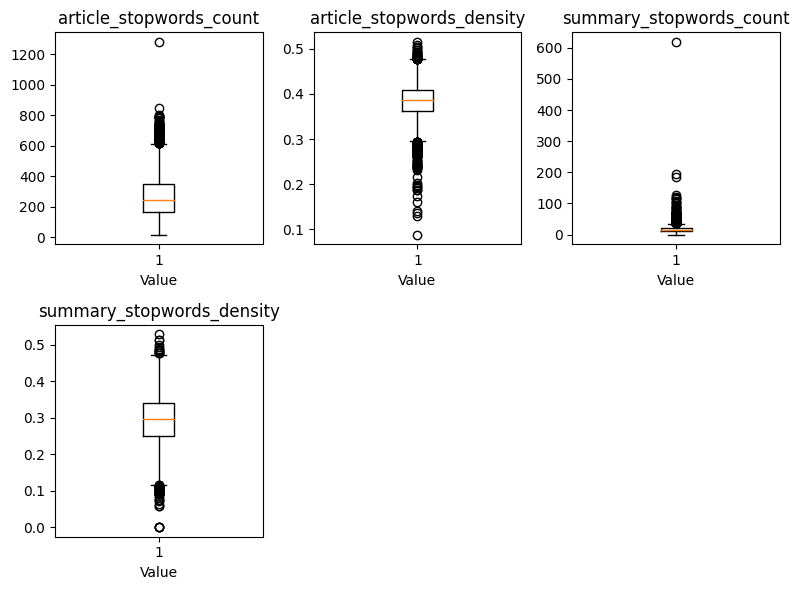

In [28]:
# Use of Stopwords and Punctuations
stp_words_count= ['article_stopwords_count','article_stopwords_density','summary_stopwords_count','summary_stopwords_density']
plot_box_plots(sample_df, stp_words_count)